ODR


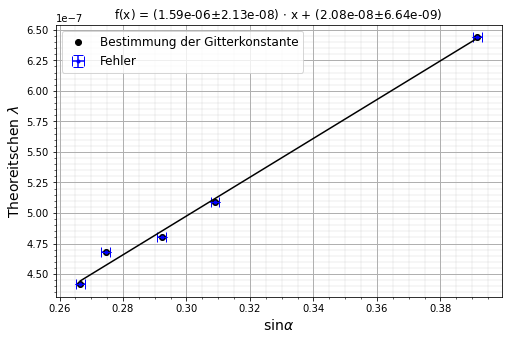

d_theo=1.6666666666666667e-06
d :1.5890787621405261e-06 +- 2.1303926496672916e-08
[603759.62115667 586812.12070727 608828.85139632 607604.57769468
 608324.84143394]


In [26]:
import matplotlib



SMALL_SIZE = 10
MEDIUM_SIZE = 12
BIGGER_SIZE = 14


matplotlib.rc('font', size=MEDIUM_SIZE)          # controls default text sizes
matplotlib.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
matplotlib.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
matplotlib.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
matplotlib.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
matplotlib.rc('legend', fontsize=MEDIUM_SIZE)    # legend fontsize
matplotlib.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title






%run ../odr_v2.ipynb
%run ../arr2table_v3.2.ipynb
#Theo:
#Violett,Blau,Grün,Hellblau,Rot
cdt=np.array([441.463,467.8136,479.9914,508.5824,643.84696])*1e-9

#error für grad und min
m_err=2+5
            
#linke ordung
cdlg=np.array([25,26,26,27,32])
cdlm=np.array([0,0,3,3,10])
cdl=cdlg+cdlm/60

#rechte ordung
cdrg=np.array([354,354,352,351,346])
cdrm=np.array([5,8,4,3,3])
cdr=cdrg+cdrm/60
#Justage:
cdr=(360-cdr)

cdl_err=cdr_err=m_err/60
cd=(cdl+cdr)/2
cd_err=(cdl_err)*np.sqrt(1/2)
#print(cd_err==np.sqrt((cdl_err/2)**2+(cdr_err/2)**2))

x=np.sin(np.deg2rad(cd))
x_err=np.cos(np.deg2rad(cd))*np.deg2rad(cd_err)
print("ODR")
out=zeichnen(x=x,y=cdt,scientific=[2,2],x_err=x_err,y_err=1e-30,odr=True,beta0=[1e6,0],
             fx_title="f(x)",x_title="x", m_unit="",b_unit="",label="Bestimmung der Gitterkonstante",xlabel=r"$\sin \alpha $",  ylabel="Theoreitschen $\lambda$")
d=out.beta[0]
d_err=out.sd_beta[0]
dt=1/600000
print("d_theo={}".format(dt))
print("d :{} +- {}".format(d,d_err))

print(np.sin(np.deg2rad(cd))/cdt)

Winkel alpha:
[14.5        15.03333333 17.01666667 23.91666667]

errechnete Wellenlängen(eigenes d) mit fehler
[397.87354691 412.17676552 465.04369336 644.22447262]
[5.77573473 5.95126378 6.6073217  8.88641398]


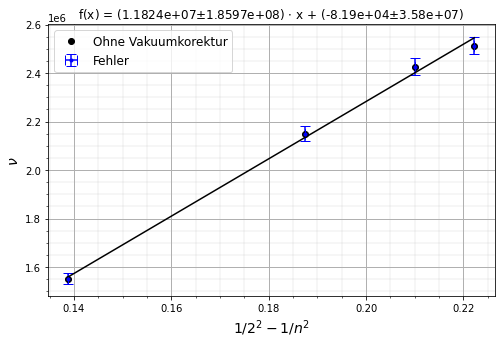

vakuum lambda (berechnetes d) mit fehler:
[397.98893024 412.29629678 465.17855603 644.41129772]
[5.7774097  5.95298964 6.60923782 8.88899104]


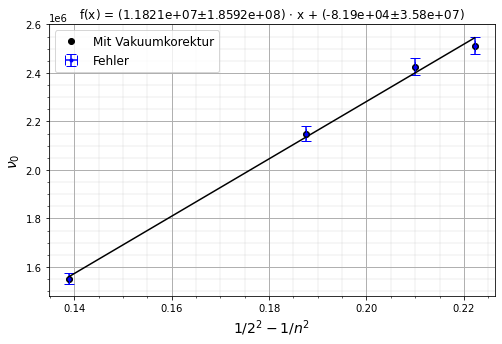


 Rydberg theo:
(7, 1.097373156816)
Abweichung von vakuum:
1.0771685471300936


In [35]:
#Violett,Violett,Blau-Grün(Türkis),Rot
#Hδ,Hγ,Hβ,Hα
#6,5,4,3

#linke ordung
hlg=np.array([24,24,26,33])
hlm=np.array([0,5,10,0])
hl=hlg+hlm/60

#rechte ordung
hrg=np.array([355,354,352,345])
hrm=np.array([0,1,8,10])
hr=hrg+hrm/60
#Justage:
hr=(360-hr)

#Fehler vom winkel:
hl_err=hr_err=m_err/60
h_err=(hl_err)*np.sqrt(1/2)

h=(hl+hr)/2
print("Winkel alpha:")
print(h)

#Wellenlängen berechnen mit d:

hlam=d*np.sin(np.deg2rad(h))

sin_h_err=np.cos(np.deg2rad(h))*np.deg2rad(h_err)
hlam_err=np.sqrt((d_err*np.sin(np.deg2rad(h)))**2+(d*sin_h_err)**2)

print("\nerrechnete Wellenlängen(eigenes d) mit fehler")
print(hlam*1e9)
print(hlam_err*1e9)

hnu=1/hlam
hnu_err=hlam_err/hlam**2

nm=np.array([1/2**2-1/(i)**2 for i in range(6,2,-1)])


zeichnen(x=nm,y=hnu,y_err=hnu_err,scientific=[4,2],beta0=[-1e7,2.5e6],label="Ohne Vakuumkorektur"
         ,xlabel=r"$1/2^2-1/n^2$",  ylabel=r"$\nu$")


if False:
    
    #theoretisches d
    print("theoreitsches d")
    hlamt=dt*np.sin(np.deg2rad(h))
    print(hlamt*1e9)
    #Wikipedia
    print("wikipedia lambda")
    hlam_wiki=np.array([410.1735,434.045,486.132,656.278])*1e-9
    print(hlam_wiki*1e9)

print("vakuum lambda (berechnetes d) mit fehler:")
nbrechindex=(1+2.9e-4)
hlam_vac=hlam*nbrechindex
hlam_vac_err=nbrechindex*hlam_err
print(hlam_vac*1e9)
print(hlam_vac_err*1e9)
hnu_vac=1/hlam_vac
hnu_vac_err=hlam_vac_err/hlam_vac**2

ryd=zeichnen(x=nm,y=hnu_vac,y_err=hnu_vac_err,scientific=[4,2],beta0=[-1e7,2.5e6],label="Mit Vakuumkorektur"
         ,xlabel=r"$1/2^2-1/n^2$",  ylabel=r"$\nu_0$")
print("\n Rydberg theo:")
print(split(cons.Rydberg))
print("Abweichung von vakuum:")
print(ryd.beta[0]/cons.Rydberg)

[1 2 3 4 5 6]
[4.51453636e-07 4.89655376e-07 5.19251871e-07 5.43437308e-07
 5.69208354e-07 5.95666361e-07]
[6.43792937e-09 6.91622538e-09 7.28965893e-09 7.59639904e-09
 7.92461443e-09 8.26287161e-09]


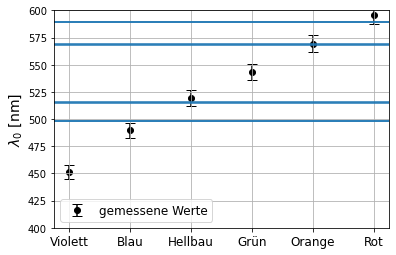

In [75]:

nlg=np.array([26,27,29,29,30,31])
nlm=np.array([0,3,8,1,4,5])
nl=nlg+nlm/60

#rechte ordung
nrg=np.array([353,351,351,349,348,347])
nrm=np.array([0,10,0,2,6,4])
nr=nrg+nrm/60
#Justage:
nr=(360-nr)

#Fehler
nl_err=nr_err=m_err/60
n=(nl+nr)/2
n_err=(nl_err)*np.sqrt(1/2)

#Wellenlängen berechnen mit d:

nlam=d*np.sin(np.deg2rad(n))

sin_n_err=np.cos(np.deg2rad(n))*np.deg2rad(n_err)
nlam_err=np.sqrt((d_err*np.sin(np.deg2rad(n)))**2+(d*sin_n_err)**2)

#Vakuum
nbrechindex=(1+2.9e-4)
nlam_vac=nlam*nbrechindex
nlam_vac_err=nbrechindex*nlam_err


xn=np.arange(1,len(nlam_vac)+1,1)
print(xn)
print(nlam_vac)
print(nlam_vac_err)

term_dick_sichtbar=np.array([588.9963,589.593,616.073,568.882,568.267])
term_dunn_sichtbar=np.array([285.283,330.234,285.302,330.204,615.427,
                             515.365,514.909,498.287,497.861])
ntheo=nlam_vac
fig, ax = plt.subplots(1,1) 

ax.errorbar(xn,nlam_vac*10**9,yerr=nlam_vac_err*10**9,fmt="o" , color="k", label="gemessene Werte",capsize=5,zorder=1)
#ax.plot(xn,ntheo*10**9,'ro',label="theoretische Werte",alpha=0.5,zorder=2)
for l in term_dick_sichtbar:
    ax.axhline(y=l)
for l in term_dunn_sichtbar:
    ax.axhline(y=l)

plt.ylim(400,600)
ax.set_xticks(xn)
x_ticks_labels = ['Violett','Blau','Hellbau','Grün','Orange','Rot']
ax.set_xticklabels(x_ticks_labels, rotation='horizontal', fontsize=12)

plt.ylabel("$\lambda_0$ [nm]")
plt.legend()
plt.grid()
